In [1]:
#Importing libraries and dataframe
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt 

In [3]:
#Reading Data 
df = pd.read_csv("Data/Processed/citibike_2022_with_weather.csv")

/var/folders/wf/s0crnzgd66b7pdj9_7_b6mpw0000gn/T/ipykernel_3600/2435470205.py:2: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Data/Processed/citibike_2022_with_weather.csv")


In [4]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp,_merge
0,3A2034DA67C8874B,electric_bike,2022-09-14 20:37:39.155,2022-09-14 21:05:39.760,N 12 St & Bedford Ave,5450.04,Albany St & Greenwich St,5145.02,40.720796,-73.954882,40.709267,-74.013247,casual,2022-09-14,22.9,both
1,F1C63DACDCC1C33D,electric_bike,2022-09-17 19:21:39.407,2022-09-17 20:08:32.670,Union Ave & Jackson St,5300.06,Metropolitan Ave & Meeker Ave,5300.05,40.716075,-73.952029,40.714133,-73.952344,casual,2022-09-17,20.8,both
2,94372C52777F4AC1,electric_bike,2022-09-17 16:49:21.830,2022-09-17 17:01:51.537,S 4 St & Wythe Ave,5204.05,St Marks Pl & 1 Ave,5626.13,40.712874,-73.965935,40.727791,-73.985649,casual,2022-09-17,20.8,both
3,44818FEC94B62B66,electric_bike,2022-09-08 12:27:40.019,2022-09-08 12:47:15.649,Amsterdam Ave & W 73 St,7260.09,Washington St & Gansevoort St,6039.06,40.779668,-73.980930,40.739323,-74.008119,casual,2022-09-08,21.8,both
4,F8A63709F214EBAA,classic_bike,2022-09-16 19:00:19.266,2022-09-16 19:07:28.905,University Pl & E 14 St,5905.14,Washington St & Gansevoort St,6039.06,40.734814,-73.992085,40.739323,-74.008119,member,2022-09-16,19.6,both


In [38]:
#Seaborn style & palette
sns.set_theme(style="dark", palette="Blues_r")

# Bar Charts : Top 20 Starting Locations

In [39]:
#Counting station usage & getting top 20
top_stations = df['start_station_name'].value_counts().head(20).reset_index()
top_stations.columns = ['Start Station', 'Trip Count']

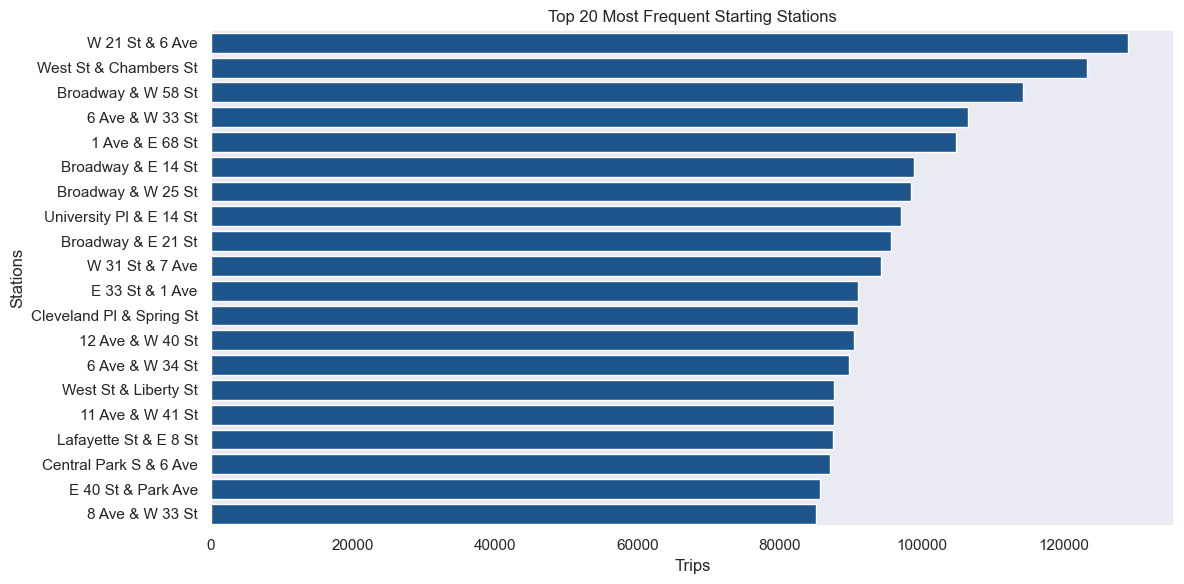

In [40]:
#Plotting
plt.figure(figsize=(12,6))
sns.barplot(data=top_stations, x='Trip Count', y='Start Station')
plt.title("Top 20 Most Frequent Starting Stations")
plt.xlabel("Trips")
plt.ylabel("Stations")
plt.tight_layout()
plt.show()

# Dual A-xis: Seasonality Plot

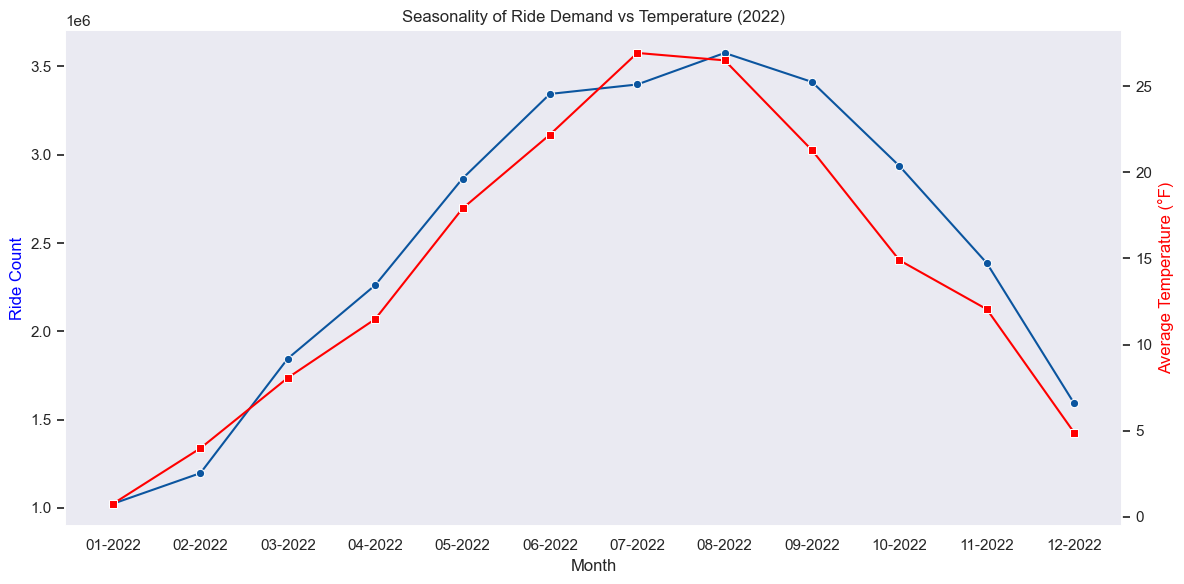

In [41]:
#Making sure started_at is datetime
df['started_at'] = pd.to_datetime(df['started_at'])

#Keeping only 2022 data
df_2022 = df[df['started_at'].dt.year == 2022].copy()

#Creating a month label "MM/YYYY"
df_2022['month'] = df_2022['started_at'].dt.strftime('%m-%Y')

#Aggregrating by month
monthly_2022 = df_2022.groupby('month').agg({
    'ride_id': 'count',
    'avgTemp': 'mean'
}).reset_index()

#Sorting months in calendar order
monthly_2022 = monthly_2022.sort_values(
    'month',
    key=lambda s: pd.to_datetime(s, format='%m-%Y'))

#Plotting
fig, ax1 = plt.subplots(figsize=(12,6))

sns.lineplot(data=monthly_2022, x='month', y='ride_id', marker='o', ax=ax1)
ax1.set_title("Seasonality of Ride Demand vs Temperature (2022)")
ax1.set_xlabel("Month")
ax1.set_ylabel("Ride Count", color='blue')

ax2 = ax1.twinx()
sns.lineplot(data=monthly_2022, x='month', y='avgTemp', marker='s', color='red', ax=ax2)
ax2.set_ylabel("Average Temperature (°F)", color='red')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Box Plot : Categorical Variable

In [34]:
#Creating a duration column first

#Making sure datetime fields are in datetime format
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

#Trip duration in minutes
df['trip_duration_min'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60

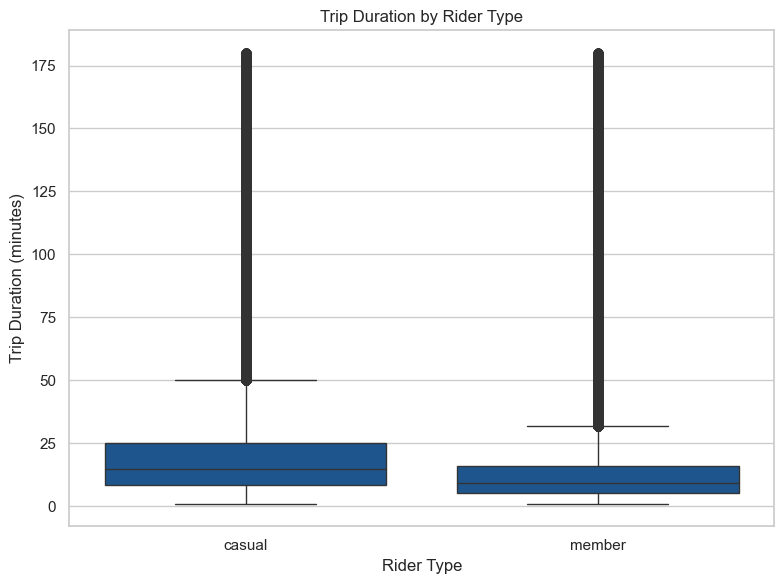

In [36]:
#Plotting
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_clean, x='member_casual', y='trip_duration_min')
plt.title("Trip Duration by Rider Type")
plt.xlabel("Rider Type")
plt.ylabel("Trip Duration (minutes)")
plt.tight_layout()
plt.show()

# FacetGrid : Trip Duration by Rider Type

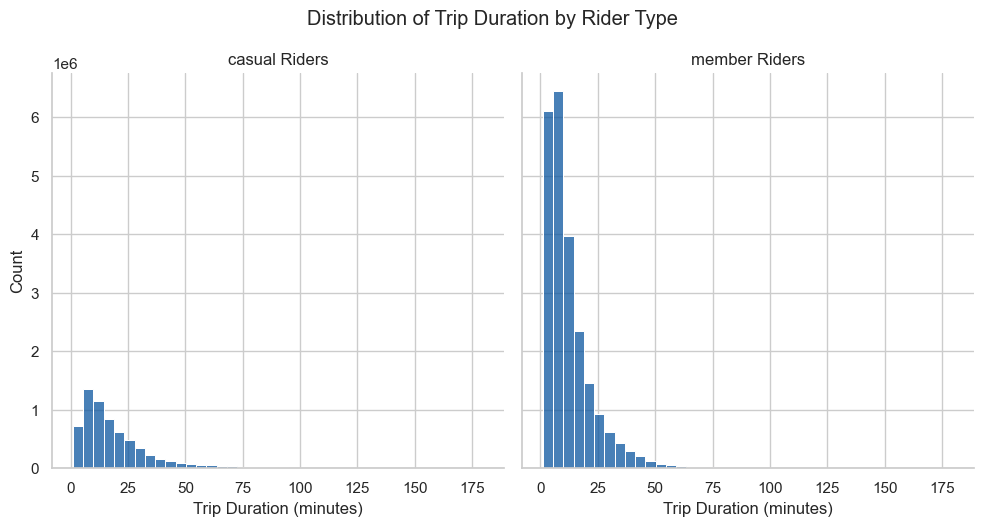

In [37]:
#FacetGrid to compare trip duration distributions by rider type
g = sns.FacetGrid(df_clean, col="member_casual", height=5, sharex=True, sharey=True)
g.map(sns.histplot, "trip_duration_min", bins=40)

g.set_axis_labels("Trip Duration (minutes)", "Count")
g.set_titles(col_template="{col_name} Riders")
g.fig.suptitle("Distribution of Trip Duration by Rider Type", y=1.05)

plt.show()